## Looking at effects of different weather on survey completeness

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [159]:
from astropy.table import Table
from astropy.time import Time

from desisurvey.progress import Progress

In [6]:
surveysim_output = '/Users/belaabolfathi/surveysim_output/'

In [10]:
%%sh
cd /Users/belaabolfathi/surveysim_output
ls

output_211
output_311
output_44
output_532
output_89


#### Import progress files for different seeds

In [43]:
progress44 = Table.read(surveysim_output+'output_44/progress.fits')
progress89 = Table.read(surveysim_output+'output_89/progress.fits')
progress211 = Table.read(surveysim_output+'output_211/progress.fits')
progress311 = Table.read(surveysim_output+'output_311/progress.fits')
progress532 = Table.read(surveysim_output+'output_532/progress.fits')

In [148]:
# Just seeing what the exposure table looks like...

Progress(restore=surveysim_output+'output_211/progress.fits').get_exposures().write('exposures211.fits')
exposures211 = Table.read('exposures211.fits')
exposures211[:2]
# each tile is viewed 1-3 times it seems
# want to group by tile, not exposure (max # exposures is 32)

INFO:progress.py:133:__init__: Loaded progress from /Users/belaabolfathi/surveysim_output/output_211/progress.fits.


INFO:DESI:Loaded progress from /Users/belaabolfathi/surveysim_output/output_211/progress.fits.


tileid,pass,ra,dec,night,mjd,exptime,seeing,transparency,airmass,moonfrac,moonalt,moonsep
,,,,,,s,arcsec,,,,deg,deg
int32,int16,float64,float64,str10,float64,float64,float64,float64,float64,float64,float64,float64
28833,5,341.04,29.76,2019-12-01,58819.0583701,533.0788911,0.857768177986,0.881722152233,1.00088236354,0.315489669913,34.1941411183,54.4260075235
23195,4,343.4,30.09,2019-12-01,58819.0659289,866.619607194,1.3745957613,0.93572062254,1.0006894996,0.315489669913,33.3652328242,55.6326331094


#### Look at frequency of passes over survey lifetime

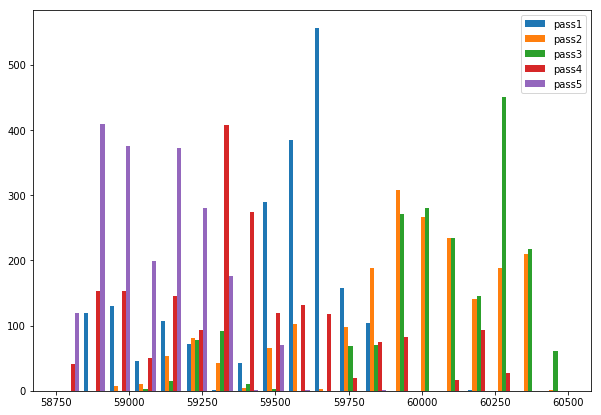

In [139]:
def get_pass(table, pass_number):
    return(table[table['pass'] == pass_number])

# picks out first exposure in each tile
# seed 211
plt.figure(figsize=(10,7))
plt.hist((get_pass(progress211, 1)['mjd'][:,0], get_pass(progress211, 2)['mjd'][:,0], 
          get_pass(progress211, 3)['mjd'][:,0], get_pass(progress211, 4)['mjd'][:,0],
         get_pass(progress211, 5)['mjd'][:,0]), bins=20, range=(58750,60500), 
         label=('pass1', 'pass2', 'pass3', 'pass4', 'pass5'))
plt.legend()
plt.show()

In [340]:
def get_start_end_dates(exposures):
    return(np.min(exposures['mjd']), np.max(exposures['mjd']))

start211, end211 = get_start_end_dates(exposures211)
print('Seed 211 start: {}, end: {}'.format(start211, end211))

start311, end311 = get_start_end_dates(exposures311)
print('Seed 311 start: {}, end: {}'.format(start311, end311))

Seed 211 start: 58819.05837013017, end: 60553.40369270227
Seed 311 start: 58819.05837013017, end: 60499.42910391255


#### Histogram of completed tiles for each seed

In [337]:
# have as input the date at which you want to calculate the fraction of completed tiles

def get_progress_file(seed):
    return surveysim_output+'output_'+str(seed)+'/progress.fits'

def get_completed(seed, start_date, end_date, percent=False):
    file = get_progress_file(seed)
    progress = Progress(restore=file, max_exposures=32)
    num_complete, num_total, percent_complete = progress.copy_range(mjd_min=start_date, 
                                                                    mjd_max=end_date).completed(include_partial=True, 
                                                                    only_passes=None, as_tuple=True)
    if percent:
        return(percent_complete)
    
    else: 
        return(num_complete)

def tile_progress(seed_list, start_date='2019-12-01', end_date=None, percent_complete=False):
    # progress is a list of progress seeds
   
    completed = []
    seed_index = np.arange(len(seed_list))
    seed_num = []
    start_mjd = Time(start_date).mjd
    end_mjd = Time(end_date).mjd
    
    if percent_complete:
        for i, seed in enumerate(seed_list):
            completed.append(get_completed(seed, start_mjd, end_mjd, percent=True))
            seed_num.append('Seed '+str(seed))
            plt.ylabel('Percentage completed')
        
    else:
        for i, seed in enumerate(seed_list):
            completed.append(get_completed(seed, start_mjd, end_mjd))
            seed_num.append('Seed '+str(seed))
            plt.ylabel('Number completed (out of 16071)')
        
    plt.bar(seed_index, np.asarray(completed), align='center', alpha=0.5)
    objects = seed_num
    plt.xticks(seed_index, objects)
    plt.title('Start date: {}, End date: {}'.format(start_date, end_date))

##### Can view as percent of total tiles comlete

INFO:progress.py:133:__init__: Loaded progress from /Users/belaabolfathi/surveysim_output/output_44/progress.fits.


INFO:DESI:Loaded progress from /Users/belaabolfathi/surveysim_output/output_44/progress.fits.


INFO:progress.py:133:__init__: Loaded progress from /Users/belaabolfathi/surveysim_output/output_89/progress.fits.


INFO:DESI:Loaded progress from /Users/belaabolfathi/surveysim_output/output_89/progress.fits.


INFO:progress.py:133:__init__: Loaded progress from /Users/belaabolfathi/surveysim_output/output_211/progress.fits.


INFO:DESI:Loaded progress from /Users/belaabolfathi/surveysim_output/output_211/progress.fits.


INFO:progress.py:133:__init__: Loaded progress from /Users/belaabolfathi/surveysim_output/output_311/progress.fits.


INFO:DESI:Loaded progress from /Users/belaabolfathi/surveysim_output/output_311/progress.fits.


INFO:progress.py:133:__init__: Loaded progress from /Users/belaabolfathi/surveysim_output/output_532/progress.fits.


INFO:DESI:Loaded progress from /Users/belaabolfathi/surveysim_output/output_532/progress.fits.


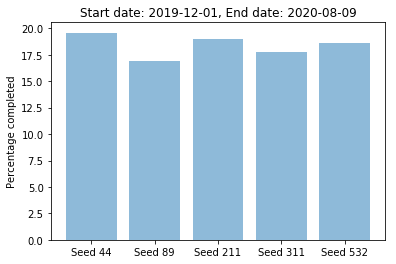

In [338]:
tile_progress([44, 89, 211, 311, 532], end_date='2020-08-09', percent_complete=True)

##### View as number of tiles completed

INFO:progress.py:133:__init__: Loaded progress from /Users/belaabolfathi/surveysim_output/output_44/progress.fits.


INFO:DESI:Loaded progress from /Users/belaabolfathi/surveysim_output/output_44/progress.fits.


INFO:progress.py:133:__init__: Loaded progress from /Users/belaabolfathi/surveysim_output/output_89/progress.fits.


INFO:DESI:Loaded progress from /Users/belaabolfathi/surveysim_output/output_89/progress.fits.


INFO:progress.py:133:__init__: Loaded progress from /Users/belaabolfathi/surveysim_output/output_211/progress.fits.


INFO:DESI:Loaded progress from /Users/belaabolfathi/surveysim_output/output_211/progress.fits.


INFO:progress.py:133:__init__: Loaded progress from /Users/belaabolfathi/surveysim_output/output_311/progress.fits.


INFO:DESI:Loaded progress from /Users/belaabolfathi/surveysim_output/output_311/progress.fits.


INFO:progress.py:133:__init__: Loaded progress from /Users/belaabolfathi/surveysim_output/output_532/progress.fits.


INFO:DESI:Loaded progress from /Users/belaabolfathi/surveysim_output/output_532/progress.fits.


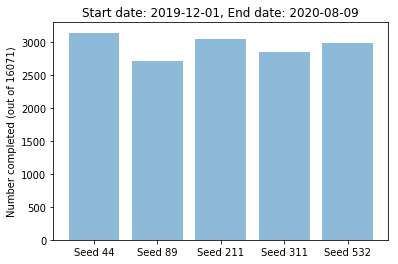

In [339]:
tile_progress([44, 89, 211, 311, 532], end_date='2020-08-09')